In [2]:
import random
import networkx as nx

In [3]:
g = nx.powerlaw_cluster_graph(40, 5, 0.5)
h = nx.powerlaw_cluster_graph(40, 5, 0.5)

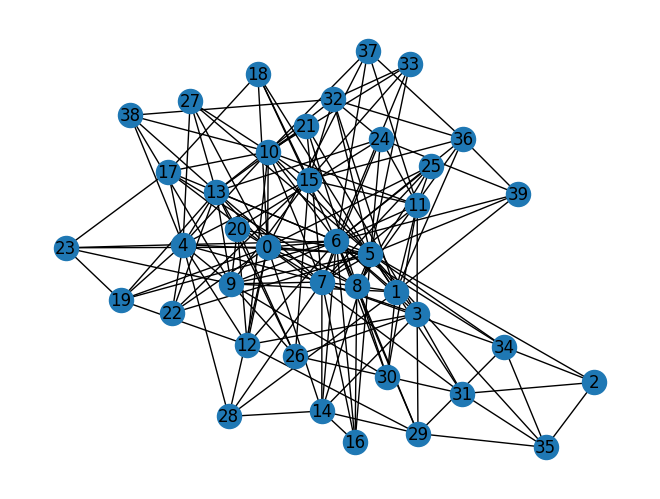

In [4]:
nx.draw(g, with_labels=True)

In [5]:
u = nx.union(g, h, rename=("G", "H"))
u.add_edge('G0', 'H0')

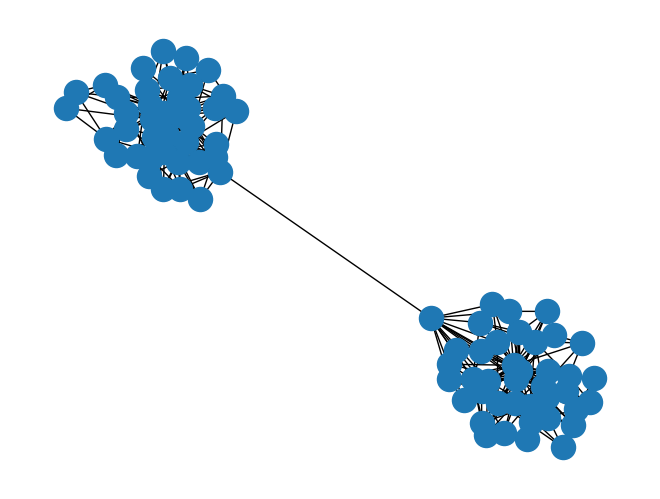

In [6]:
nx.draw(u)

In [7]:
import networkx as nx
import random


def prob_of_cluster(g, s):
    S = int(s * g.number_of_nodes())
    random_nodes = random.sample(list(g.nodes), k=S)
    k = 0
    for node in random_nodes:
        num_of_neighbors = len(g.edges(node))
        v = num_of_neighbors * 2 / (num_of_neighbors * (num_of_neighbors - 1) + 0.1)
        k += v
    kl = k / S
    K = g.number_of_edges() * 2 / (g.number_of_nodes() * (g.number_of_nodes() - 1))
    delta = kl / K - 1
    return delta


def get_random_split(g):
    subgraph1_size = g.number_of_nodes() // 2
    subgraph1_nodes = random.sample(list(g.nodes), k=subgraph1_size)
    subgraph2_nodes = [node for node in g.nodes if node not in subgraph1_nodes]

    subgraph1 = nx.Graph([edge for edge in g.edges if edge[0] in subgraph1_nodes and edge[1] in subgraph1_nodes])
    subgraph2 = nx.Graph([edge for edge in g.edges if edge[0] in subgraph2_nodes and edge[1] in subgraph2_nodes])
    print(prob_of_cluster(subgraph1, 0.25))
    print(prob_of_cluster(subgraph2, 0.25))
    u = nx.union(subgraph1, subgraph2, rename=("A", "B"))
    u.add_edge('A0', 'B0')
    u.add_edge('A1', 'B1')
    u.add_edge('A2', 'B2')
    u.add_edge('A3', 'B3')
    u.add_edge('A4', 'B4')
    print(prob_of_cluster(u, 0.25))

    print()
    return subgraph1, subgraph2

# base
def optimize_version_0(g, sub1, sub2, k=1000):
    best_v = 10000000000
    for i in range(k):
        sub1c = sub1.copy()
        sub2c = sub2.copy()
        node = random.choice(list(sub1c.nodes))
        edge_added = False
        for edge in g.edges:
            if (node == edge[1] and sub2c.has_node(edge[0])) \
                    or (node == edge[0] and sub2c.has_node(edge[1])):
                sub2c.add_edge(*edge)
                edge_added = True
        if edge_added:
            sub1c.remove_node(node)


        node = random.choice(list(sub2c.nodes))
        edge_added = False
        for edge in g.edges:
            if (node == edge[1] and sub1c.has_node(edge[0])) \
                    or (node == edge[0] and sub1c.has_node(edge[1])):
                sub1c.add_edge(*edge)
                edge_added = True
        if edge_added:
            sub2c.remove_node(node)

        v = prob_of_cluster(sub1c, 0.25) + prob_of_cluster(sub2c, 0.25)
        if v < best_v:
            print(v)
            best_v = v
            sub1 = sub1c
            sub2 = sub2c
    print(best_v)
    return sub1, sub2


In [8]:
# lost nodes
def optimize_version_1(g, A, B, k=1000):
    best_v = prob_of_cluster(A, 0.25) + prob_of_cluster(B, 0.25)
    best_A = A.copy()
    best_B = B.copy()
    for i in range(k):
        Ac = best_A.copy()
        Bc = best_B.copy()
        node = random.choice(list(Ac.nodes))
        edge_added = False
        print('bc nodes', Bc.nodes)
        for edge in g.edges:
            if (node == edge[1] and Bc.has_node(edge[0])) \
                    or (node == edge[0] and Bc.has_node(edge[1])):
                Bc.add_edge(*edge)
                print(*edge)
                edge_added = True
        if edge_added:
            print('to B', node)
            Ac.remove_node(node)


        node = random.choice(list(Bc.nodes))
        edge_added = False
        print('ac nodes', Ac.nodes)
        for edge in g.edges:
            if (node == edge[1] and Ac.has_node(edge[0])) \
                    or (node == edge[0] and Ac.has_node(edge[1])):
                Ac.add_edge(*edge)
                edge_added = True
                print(*edge)
        if edge_added:
            print('to A', node)
            Bc.remove_node(node)
        print('----------')
        v = prob_of_cluster(Ac, 0.25) + prob_of_cluster(Bc, 0.25)
        if v < best_v:
            print(v)
            best_v = v
            best_A = Ac.copy()
            best_B = Bc.copy()
    print(best_v)
    return best_A, best_B

In [9]:
# criteria change
def optimize_version_2(g, A, B, k=1000):
    best_v = -1000000 #prob_of_cluster(A, 0.25) + prob_of_cluster(B, 0.25)
    best_A = A.copy()
    best_B = B.copy()
    for i in range(k):
        Ac = best_A.copy()
        Bc = best_B.copy()
        node = random.choice(list(Ac.nodes))
        edge_added = False
        for edge in g.edges:
            if (node == edge[1] and Bc.has_node(edge[0])) \
                    or (node == edge[0] and Bc.has_node(edge[1])):
                Bc.add_edge(*edge)
                edge_added = True
        if edge_added:
            print('to B', node)
            Ac.remove_node(node)

        node = random.choice(list(Bc.nodes))
        edge_added = False
        for edge in g.edges:
            if (node == edge[1] and Ac.has_node(edge[0])) \
                    or (node == edge[0] and Ac.has_node(edge[1])):
                Ac.add_edge(*edge)
                edge_added = True
        if edge_added:
            print('to A', node)
            Bc.remove_node(node)

        U = nx.union(Ac, Bc)

        for edge in g.edges:
            if Bc.has_node(edge[0]) and Ac.has_node(edge[1]) \
                    or Bc.has_node(edge[1]) and Ac.has_node(edge[0]):
                U.add_edge(*edge)

        v = prob_of_cluster(U, 1)
        print('----------')
        if v > best_v:
            print(v)
            best_v = v
            best_A = Ac.copy()
            best_B = Bc.copy()
    print(best_v)
    return best_A, best_B

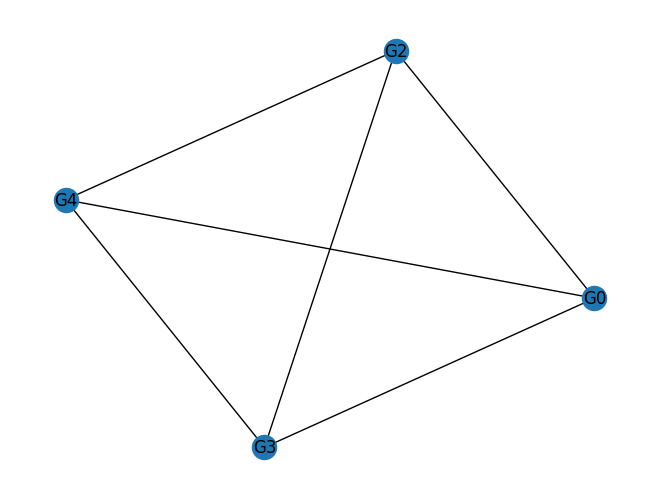

In [10]:
# adjacency_matrix

g = nx.complete_graph(5)
h = nx.complete_graph(5)
u = nx.union(g, h, rename=("G", "H"))

o = nx.Graph()
g = nx.union(g, o, rename=("G", "O"))
h = nx.union(h, o, rename=("H", "O"))


h.add_edge('H0', 'G0')
g.remove_node('G0')
h.add_edge('H1', 'G1')
g.remove_node('G1')
####################################################################

Ac = h.copy()
Bc = g.copy()

added_nodes = []

for node in list(Ac.nodes):
    for edge in u.edges:
        if (node == edge[1] and Bc.has_node(edge[0]) and not Ac.has_node(edge[0])) \
                or (node == edge[0] and Bc.has_node(edge[1]) and not Ac.has_node(edge[1])):
            Bc.add_edge(*edge)
            added_nodes.append(node)

nodes_indexes = {}
for index, node in enumerate(list(Bc.nodes)):
    nodes_indexes[node] = index

best_degree = -1
best_node = ''
for added_node in added_nodes:
    s = nx.adjacency_matrix(Bc).todense()[nodes_indexes[added_node]].sum(1).getA()[0][0]
    if s > best_degree:
        best_degree = s
        best_node = added_node

h.remove_node(best_node)
for edge in u.edges:
    if (best_node == edge[1] and g.has_node(edge[0])) \
            or (best_node == edge[0] and g.has_node(edge[1])):
        g.add_edge(*edge)
nx.draw(g, with_labels=True)


In [11]:
def getExpGraph(u, A, B):
    A_exp = A.copy()
    B_exp = B.copy()
    added_nodes = set()
    for node in A_exp.nodes:
        for edge in u.edges(node):
            if B_exp.has_node(edge[1]) and not A_exp.has_node(edge[1]):
                B_exp.add_edge(*edge)
                added_nodes.add(node)

    nodes_indexes = {}
    for index, node in enumerate(list(B_exp.nodes)):
        nodes_indexes[node] = index

    return B_exp, added_nodes, nodes_indexes

def find_node(B_exp, added_nodes, nodes_indexes):
    best_degree = -1
    best_node = ''
    for added_node in added_nodes:
        s = nx.adjacency_matrix(B_exp).todense()[nodes_indexes[added_node]].sum(1).getA()[0][0]
        if s > best_degree:
            best_degree = s
            best_node = added_node
    return best_node

def optimize_version_with_adj_fast(g, A, B, k=1000):
    best_v = 100000 # prob_of_cluster(A, 0.25) + prob_of_cluster(B, 0.25)
    best_A = A.copy()
    best_B = B.copy()


    B_exp, added_nodes_to_B, nodes_indexes_B = getExpGraph(g, A.copy(), B.copy())
    A_exp, added_nodes_to_A, nodes_indexes_A = getExpGraph(g, B.copy(), A.copy())
    for i in range(k):
        print('--')
        best_node_to_B = find_node(B_exp, added_nodes_to_B, nodes_indexes_B)
        print('--+')
        best_node_to_A = find_node(A_exp, added_nodes_to_A, nodes_indexes_A)
        print('--_')

        for edge in g.edges:
            if (best_node_to_B == edge[1] and Bc.has_node(edge[0])) \
                    or (best_node_to_B == edge[0] and Bc.has_node(edge[1])):
                Bc.add_edge(*edge)
        Ac.remove_node(best_node_to_B)
        print('to B', best_node_to_B)

        for edge in g.edges:
            if (best_node_to_A == edge[1] and Ac.has_node(edge[0])) \
                    or (best_node_to_A == edge[0] and Ac.has_node(edge[1])):
                Ac.add_edge(*edge)
        Bc.remove_node(best_node_to_A)
        print('to A', best_node_to_A)

        print('------')
        v = prob_of_cluster(Ac, 1) + prob_of_cluster(Bc, 1)

        #U = nx.union(Ac, Bc)

        #for edge in g.edges:
        #    if Bc.has_node(edge[0]) and Ac.has_node(edge[1]) \
        #            or Bc.has_node(edge[1]) and Ac.has_node(edge[0]):
        #        U.add_edge(*edge)

        #v = prob_of_cluster(U, 1)
        if v < best_v:
            print(v)
            best_v = v
            best_A = Ac
            best_B = Bc
    print(best_v)
    return best_A, best_B

In [162]:
def find_node(u, A, B, prev_node):
    A_exp = A.copy()
    B_exp = B.copy()
    added_nodes = set()
    for node in A_exp.nodes:
        if prev_node == node:
            continue
        for edge in u.edges(node):
            if B_exp.has_node(edge[1]) and not A_exp.has_node(edge[1]):
                B_exp.add_edge(*edge)
                added_nodes.add(node)

    nodes_indexes = {}
    for index, node in enumerate(list(B_exp.nodes)):
        nodes_indexes[node] = index

    best_degree = -1
    best_node = ''
    dense = nx.adjacency_matrix(B_exp).todense()
    for added_node in added_nodes:
        s = dense[nodes_indexes[added_node]].sum(1).getA()[0][0]
        if s > best_degree:
            best_degree = s
            print(s)
            best_node = added_node
    return best_node


def optimize_version_with_adj(g, A, B, k=1000):
    best_v = 100000 # prob_of_cluster(A, 0.25) + prob_of_cluster(B, 0.25)
    best_A = A.copy()
    best_B = B.copy()

    prev_best_nodes = (None, None)
    best_node_to_B = None
    best_node_to_A = None
    for i in range(k):
        Ac = best_A.copy()
        Bc = best_B.copy()

        while (best_node_to_B, best_node_to_A) == prev_best_nodes:
            print(best_node_to_B, best_node_to_A)
            print(prev_best_nodes)
            print('+++++')
            best_node_to_B = find_node(g, Ac, Bc, best_node_to_B)
            best_node_to_A = find_node(g, Bc, Ac, best_node_to_A)
            print(best_node_to_B, best_node_to_A)

        prev_best_nodes = (best_node_to_B, best_node_to_A)

        for edge in g.edges:
            if (best_node_to_B == edge[1] and Bc.has_node(edge[0])) \
                    or (best_node_to_B == edge[0] and Bc.has_node(edge[1])):
                Bc.add_edge(*edge)
        Ac.remove_node(best_node_to_B)
        print('to B', best_node_to_B)

        for edge in g.edges:
            if (best_node_to_A == edge[1] and Ac.has_node(edge[0])) \
                    or (best_node_to_A == edge[0] and Ac.has_node(edge[1])):
                Ac.add_edge(*edge)
        Bc.remove_node(best_node_to_A)
        print('to A', best_node_to_A)

        print('------')
        v = prob_of_cluster(Ac, 1) + prob_of_cluster(Bc, 1)

        # U = nx.union(Ac, Bc)

        #for edge in g.edges:
        #    if Bc.has_node(edge[0]) and Ac.has_node(edge[1]) \
        #            or Bc.has_node(edge[1]) and Ac.has_node(edge[0]):
        #        U.add_edge(*edge)

        #v = prob_of_cluster(U, 1)
        if v < best_v:
            print(v)
            best_v = v
            best_A = Ac
            best_B = Bc
    print(best_v)
    return best_A, best_B

In [227]:
def find_node2(u, A, B, ignore_nodes):
    A_exp = A.copy()
    B_exp = B.copy()
    added_nodes = set()
    for node in A_exp.nodes:
        if ignore_nodes.get(node) is not None:
            continue
        for edge in u.edges(node):
            if B_exp.has_node(edge[1]) and not A_exp.has_node(edge[1]):
                B_exp.add_edge(*edge)
                added_nodes.add(node)

    nodes_indexes = {}
    for index, node in enumerate(list(B_exp.nodes)):
        nodes_indexes[node] = index

    best_degree = -1
    best_node = ''
    dense = nx.adjacency_matrix(B_exp).todense()
    for added_node in added_nodes:
        s = dense[nodes_indexes[added_node]].sum(1).getA()[0][0]
        if s > best_degree:
            best_degree = s
            best_node = added_node
    return best_node


def optimize_version_with_adj_2(g, A, B, k=1000):
    best_v = 100000 # prob_of_cluster(A, 0.25) + prob_of_cluster(B, 0.25)
    best_A = A.copy()
    best_B = B.copy()

    was = {None: 1}

    br = 0

    best_node_to_B = None
    best_node_to_A = None
    for i in range(k):
        Ac = best_A.copy()
        Bc = best_B.copy()

        while was.get(best_node_to_B) is not None:
            best_node_to_B = find_node2(g, Ac, Bc, was)
            print(best_node_to_B)
        was[best_node_to_B] = 1
        while was.get(best_node_to_A) is not None:
            best_node_to_A = find_node2(g, Bc, Ac, was)
            print(best_node_to_A)
        was[best_node_to_A] = 1

        for edge in g.edges:
            if (best_node_to_B == edge[1] and Bc.has_node(edge[0])) \
                    or (best_node_to_B == edge[0] and Bc.has_node(edge[1])):
                Bc.add_edge(*edge)
        Ac.remove_node(best_node_to_B)
        print('to B', best_node_to_B)

        for edge in g.edges:
            if (best_node_to_A == edge[1] and Ac.has_node(edge[0])) \
                    or (best_node_to_A == edge[0] and Ac.has_node(edge[1])):
                Ac.add_edge(*edge)
        Bc.remove_node(best_node_to_A)
        print('to A', best_node_to_A)

        print('------')
        v = prob_of_cluster(Ac, 1) + prob_of_cluster(Bc, 1)

        # U = nx.union(Ac, Bc)

        #for edge in g.edges:
        #    if Bc.has_node(edge[0]) and Ac.has_node(edge[1]) \
        #            or Bc.has_node(edge[1]) and Ac.has_node(edge[0]):
        #        U.add_edge(*edge)

        #v = prob_of_cluster(U, 1)
        br += 1
        if v < best_v:
            br = 0
            print(v)
            best_v = v
            best_A = Ac
            best_B = Bc
        if br >= 10:
            break
    print(best_v)
    return best_A, best_B

In [13]:
g = nx.powerlaw_cluster_graph(40, 5, 0.5)
h = nx.powerlaw_cluster_graph(40, 5, 0.5)

# rename nodes
o = nx.Graph()
g = nx.union(g, o, rename=("G", "O"))
h = nx.union(h, o, rename=("H", "O"))

u = nx.union(g, h)
u.add_edge('G0', 'H0')

print(prob_of_cluster(g, 0.25))
print(prob_of_cluster(h, 0.25))
print(prob_of_cluster(u, 0.25))

#s1r, s2r = optimize_version_with_adj(u,h,g)

0.5387421850491776
0.5789545094145847
1.7454252772989953


In [ ]:
def get_split_better(u, k=5):
    best_sub1 = None
    best_sub2 = None
    best_score = 10000
    for _ in range(k):
        sub1 = nx.Graph()
        sub2 = nx.Graph()

        shuffle = list(u.nodes)
        random.shuffle(shuffle)
        index_next_node = 0
        a = shuffle[index_next_node]
        index_next_node += 1
        b = shuffle[index_next_node]
        index_next_node += 1

        print(a, b)

        added = {a:1, b:1}
        sub1.add_node(a)
        sub1.add_node(b)

        queue1 = [a]
        queue2 = [b]

        def add_missed_edges(u, sub, newpoint):
            for edge in u.edges(newpoint):
                if sub.has_node(edge[1]):
                    sub.add_edge(*edge)

        while len(queue1) != 0 and len(queue2) != 0:
            p1 = queue1.pop(0)
            #if get_best_degree(u, sub1, p1) < get_best_degree(u, sub1, queue2[0]):
            #    queue1.append(p1)
            #    p1 = queue2.pop(0)
            for edge in u.edges(p1):
                if added.get(edge[1]) is None:
                    added[edge[1]] = 1
                    sub1.add_edge(*edge)
                    add_missed_edges(u, sub1, edge[1])
                    queue1.append(edge[1])

            p2 = queue2.pop(0)
            #if get_best_degree(u, sub2, p2) < get_best_degree(u, sub2, queue1[0]):
            #    queue2.append(p2)
            #    p2 = queue1.pop(0)
            for edge in u.edges(p2):
                if added.get(edge[1]) is None:
                    added[edge[1]] = 1
                    sub2.add_edge(*edge)
                    add_missed_edges(u, sub2, edge[1])
                    queue2.append(edge[1])

        s1, s2 = get_random_split(sub1)
        s3, s4 = get_random_split(sub2)

        v = prob_of_cluster(s1, 1) + prob_of_cluster(s2, 1)+ prob_of_cluster(s3, 1)+ prob_of_cluster(s4, 1)
        print('v:', v)
        if v < best_score:
            best_score = v
            best_sub1 = sub1.copy()
            best_sub2 = sub2.copy()
    return best_sub1, best_sub2

### Хороший кластеризумый граф

In [228]:
optimize = optimize_version_with_adj_2

In [229]:
def count_nodes_with_label(graph, label):
    return sum([1 for node in list(graph.nodes) if label in node])

In [230]:
#cg = nx.powerlaw_cluster_graph(400, 50, 0.5)
#ch = nx.powerlaw_cluster_graph(400, 50, 0.5)
g = nx.dense_gnm_random_graph(1000, 10000)
h = nx.dense_gnm_random_graph(1000, 10000)

# rename nodes
o = nx.Graph()
A = nx.union(g, o, rename=("A", "O"))
B = nx.union(h, o, rename=("B", "O"))

u = nx.union(A, B)
# u.add_edge('A0', 'B0')

number_of_connections = 500
random_nodes_a = random.sample(list(A.nodes), number_of_connections)
random_nodes_b = random.sample(list(B.nodes), number_of_connections)

for i in range(number_of_connections):
    u.add_edge(random_nodes_a[i], random_nodes_b[i])
    # print(random_nodes_a[i], random_nodes_b[i])

# u_split_a, u_split_b = get_random_split(u)
u_split_a, u_split_b = get_split_better(u, 5)

print('first subgraph. A:', count_nodes_with_label(u_split_a, 'A'), 'B:', count_nodes_with_label(u_split_a, 'B'))
print('second subgraph. A:', count_nodes_with_label(u_split_b, 'A'), 'B:', count_nodes_with_label(u_split_b, 'B'))

#nx.draw(u, with_labels = True)

A69 A796
79.18877218339938
158.63349148673694
213.00429931770748

138.28758674481122
58.4162339482447
242.99241638657202

v: 378.0846009831936
A956 B372
11.422506963645464
13.394238842767871
60.01189002391538

27.499367339500235
31.645723684960913
121.15888100588427

v: 90.16115510038514
B705 A135
38.091969613223306
34.357418514958624
66.07709880504449

20.40970773584395
38.10432053906165
53.39619357525724

v: 110.76871788679958
A98 B1
55.52348591927012
37.791251427834716
110.17012602711225

12.105103009333519
40.38235675628199
93.36795136481773

v: 124.56876223457466
B693 A300
31.364354459051718
57.36526428028887
90.25637748846239

23.98932724469415
60.840875634878266
84.4757473192549

v: 152.6531144192515
first subgraph. A: 960 B: 27
second subgraph. A: 40 B: 974


In [231]:
print(prob_of_cluster(A, 0.25))
print(prob_of_cluster(B, 0.25))
print(prob_of_cluster(u, 0.25))
print(prob_of_cluster(u_split_a, 0.25))
print(prob_of_cluster(u_split_b, 0.25))
print()
o,p = get_random_split(u_split_a)
print()
print(prob_of_cluster(o, 0.25))
print(prob_of_cluster(p, 0.25))


4.642736086670017
4.5653990131427955
9.581643042570125
22.76240812452877
6.692392957155995

30.777775545507687
31.589678396616932
55.465961572521515


40.26518643791953
46.39511135316008


In [232]:
#nx.draw(u_split_a, with_labels = True)

In [233]:
#nx.draw(u_split_b, with_labels = True)

In [235]:
import time
start = time.time()
s1r, s2r = optimize(u, u_split_a, u_split_b, 100)
print(time.time() - start)

print('first subgraph A.:', count_nodes_with_label(s1r, 'A'), 'B:', count_nodes_with_label(s1r, 'B'))
print('second subgraph B.:', count_nodes_with_label(s2r, 'A'), 'B:', count_nodes_with_label(s2r, 'B'))

B201
A560
to B B201
to A A560
------
41.108062498824864
B835
A317
to B B835
to A A317
------
39.85996780998449
B372
A408
to B B372
to A A408
------
B175
A452
to B B175
to A A452
------
38.66027332314904
B596
A948
to B B596
to A A948
------
B977
A288
to B B977
to A A288
------
37.431402251041845
B151
A668
to B B151
to A A668
------
36.20224536040644
B69
A267
to B B69
to A A267
------
B929
A297
to B B929
to A A297
------
34.05976829781186
B725
A28
to B B725
to A A28
------
31.910978082621703
B567
A619
to B B567
to A A619
------
30.764738593846808
B993
A921
to B B993
to A A921
------
29.527380993539076
B964
A858
to B B964
to A A858
------
27.402689250673625
B506
A195
to B B506
to A A195
------
26.270691910093113
B693
A88
to B B693
to A A88
------
B114
A894
to B B114
to A A894
------
24.16355021127048
B912
A374
to B B912
to A A374
------
B651
A658
to B B651
to A A658
------
22.072033268605544
B86
A941
to B B86
to A A941
------
B783
A132
to B B783
to A A132
------
B274
A636
to B B274
to A A

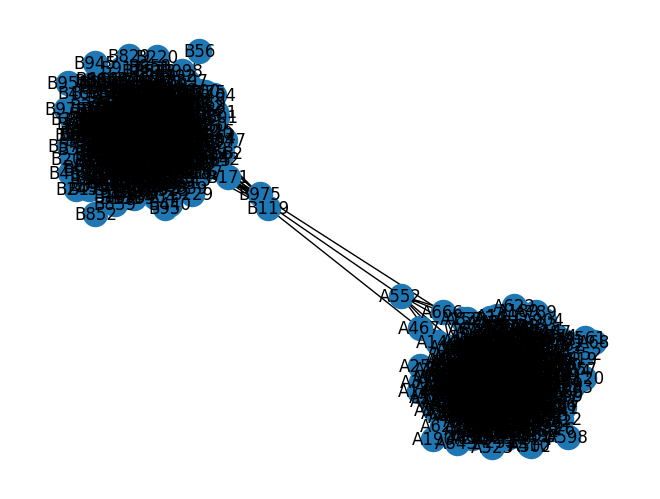

In [30]:
nx.draw(s1r, with_labels = True)

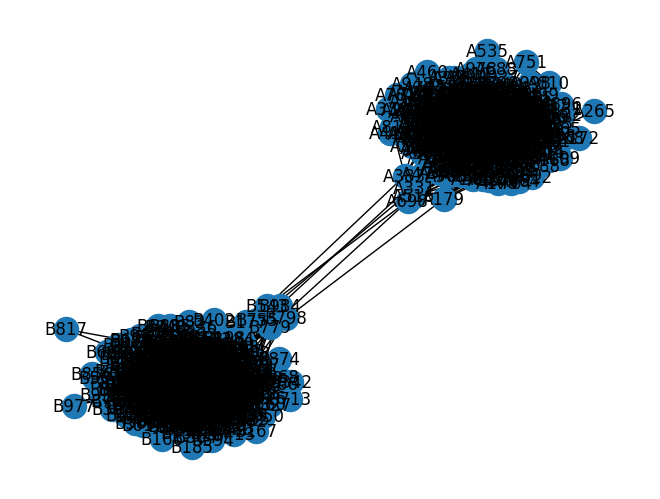

In [31]:
nx.draw(s2r, with_labels = True)

In [32]:
def get_best_degree(u, sub, point):
    sub_exp = sub.copy()
    sub_exp.add_node(point)
    for edge in u.edges(point):
        if sub.has_node(edge[1]):
            sub_exp.add_edge(*edge)

    nodes_indexes = {}
    for index, node in enumerate(list(sub_exp.nodes)):
        nodes_indexes[node] = index

    dense = nx.adjacency_matrix(sub_exp).todense()
    s = dense[nodes_indexes[point]].sum(1).getA()[0][0]
    return s

In [211]:

g = nx.dense_gnm_random_graph(1000, 10000)
h = nx.dense_gnm_random_graph(1000, 10000)

# rename nodes
o = nx.Graph()
A = nx.union(g, o, rename=("A", "O"))
B = nx.union(h, o, rename=("B", "O"))

u = nx.union(A, B)
# u.add_edge('A0', 'B0')


number_of_connections = 1000
random_nodes_a = random.sample(list(A.nodes), number_of_connections)
random_nodes_b = random.sample(list(B.nodes), number_of_connections)

for i in range(number_of_connections):
    u.add_edge(random_nodes_a[i], random_nodes_b[i])

print('u:', prob_of_cluster(u, 1))

def get_split_better(u, k=5):
    best_sub1 = None
    best_sub2 = None
    best_score = 10000
    for _ in range(k):
        sub1 = nx.Graph()
        sub2 = nx.Graph()

        shuffle = list(u.nodes)
        random.shuffle(shuffle)
        index_next_node = 0
        a = shuffle[index_next_node]
        index_next_node += 1
        b = shuffle[index_next_node]
        index_next_node += 1

        print(a, b)

        added = {a:1, b:1}
        sub1.add_node(a)
        sub1.add_node(b)

        queue1 = [a]
        queue2 = [b]

        def add_missed_edges(u, sub, newpoint):
            for edge in u.edges(newpoint):
                if sub.has_node(edge[1]):
                    sub.add_edge(*edge)

        while len(queue1) != 0 and len(queue2) != 0:
            p1 = queue1.pop(0)
            #if get_best_degree(u, sub1, p1) < get_best_degree(u, sub1, queue2[0]):
            #    queue1.append(p1)
            #    p1 = queue2.pop(0)
            for edge in u.edges(p1):
                if added.get(edge[1]) is None:
                    added[edge[1]] = 1
                    sub1.add_edge(*edge)
                    add_missed_edges(u, sub1, edge[1])
                    queue1.append(edge[1])

            p2 = queue2.pop(0)
            #if get_best_degree(u, sub2, p2) < get_best_degree(u, sub2, queue1[0]):
            #    queue2.append(p2)
            #    p2 = queue1.pop(0)
            for edge in u.edges(p2):
                if added.get(edge[1]) is None:
                    added[edge[1]] = 1
                    sub2.add_edge(*edge)
                    add_missed_edges(u, sub2, edge[1])
                    queue2.append(edge[1])

        s1, s2 = get_random_split(sub1)
        s3, s4 = get_random_split(sub2)

        v = prob_of_cluster(s1, 1) + prob_of_cluster(s2, 1) + prob_of_cluster(s3, 1) + prob_of_cluster(s4, 1)
        print('v:', v)
        if v < best_score:
            best_score = v
            best_sub1 = sub1.copy()
            best_sub2 = sub2.copy()
    return best_sub1, best_sub2

sub1, sub2 = get_split_better(u,5)

u: 9.031064346176558
A854 B548
53.784403697513945
45.604289452734704
92.91544268089419

35.45088456482808
50.41054275851879
161.7453684339493

v: 192.47446886938394
B874 A925
44.450032296235044
68.26355473697961
143.80182594057757

23.03014289432976
83.55831924674025
107.6972866547957

v: 196.3881433868086
A782 B800
34.73559684501096
72.68116543285815
165.88244801724568

66.83203028918203
66.56226890510126
104.68191428361361

v: 216.4942390833256
A153 B306
53.711342924401045
73.8613454215738
138.4159473895658

84.61536272034851
42.388978438208746
128.98725449715036

v: 206.74852819123998
A383 B528
73.3727505588562
71.45950255483123
120.25817980112055

55.232925587298105
29.371609995981693
90.25527920081373

v: 224.60310049993944


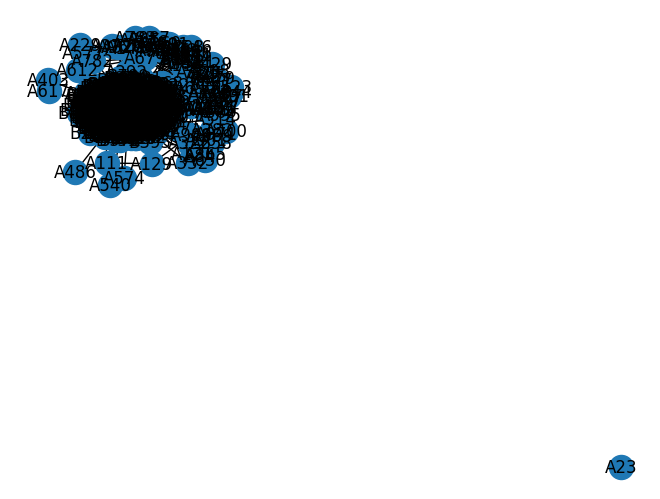

In [142]:
nx.draw(sub1, with_labels = True)

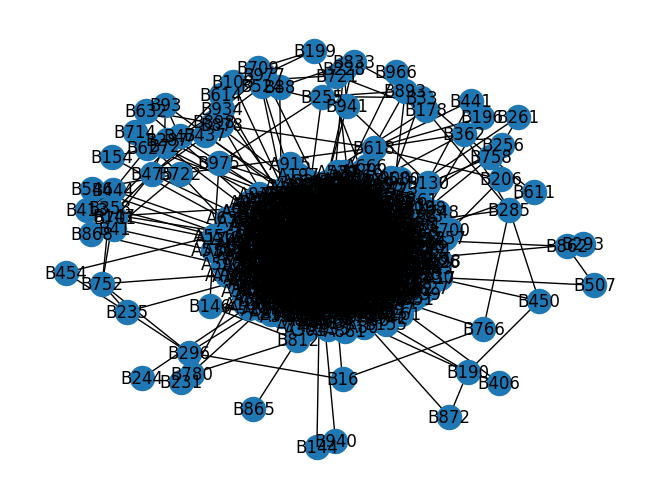

In [143]:
nx.draw(sub2, with_labels = True)

In [212]:
print(count_nodes_with_label(sub2, "A"))
print(count_nodes_with_label(sub2, "B"))
print(count_nodes_with_label(sub1, "A"))
print(count_nodes_with_label(sub1, "B"))

81
907
919
94


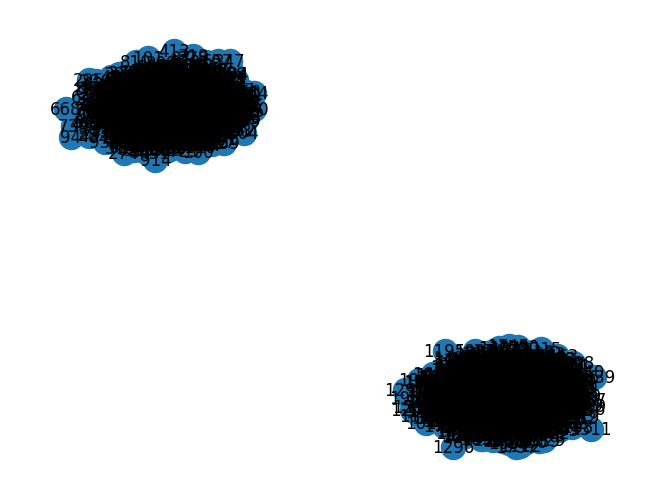

Computing transition probabilities:   0%|          | 0/2000 [00:00<?, ?it/s]

Generating walks (CPU: 8): 100%|██████████| 25/25 [00:51<00:00,  2.07s/it]

108.39559507369995


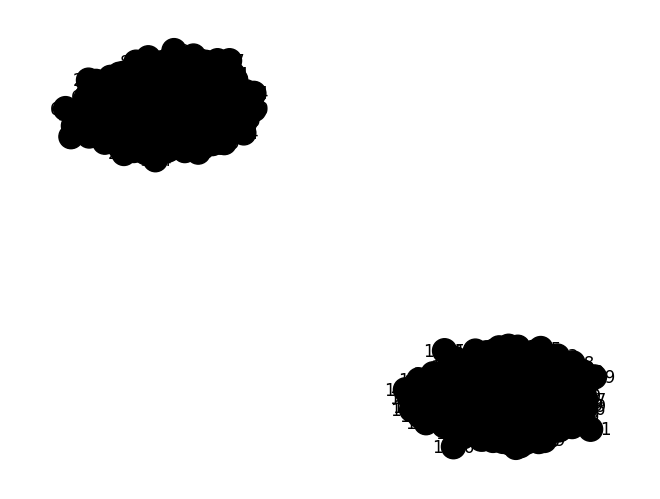

In [255]:
import networkx as nx
import matplotlib.pyplot as plt
from node2vec import Node2Vec
import time
from sklearn.cluster import KMeans

# Создание графа
h = nx.dense_gnm_random_graph(1000, 10000)
g = nx.dense_gnm_random_graph(1000, 10000)

o = nx.Graph()
A = nx.union(g, o, rename=("A", "O"))
B = nx.union(h, o, rename=("B", "O"))

G = nx.disjoint_union(A, B)

# Визуализация графа
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True)
plt.show()
start = time.time()
# Вычисление векторных представлений вершин с помощью Node2Vec
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, p=1, q=1, workers=8)
model = node2vec.fit()

# Получение векторных представлений вершин
node_embeddings = []
for i in range(len(G.nodes)):
    node_embeddings.append(model.wv[str(i)])

# Применение алгоритма кластеризации K-means
num_clusters = 2
kmeans = DBSCAN().fit(node_embeddings)
cluster_labels = kmeans.labels_
print(time.time() - start)
# Визуализация кластеров
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
color_map = [colors[cluster_labels[i]] for i in range(len(G.nodes))]
nx.draw(G, pos, with_labels=True, node_color=color_map)
plt.show()

In [281]:
import networkx as nx
from sklearn.cluster import AffinityPropagation
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Создание графов
h = nx.dense_gnm_random_graph(1000, 10000)
g = nx.dense_gnm_random_graph(1000, 10000)

o = nx.Graph()
A = nx.union(g, o, rename=("A", "O"))
B = nx.union(h, o, rename=("B", "O"))

G = nx.union(A, B)

number_of_connections = 1000
random_nodes_a = random.sample(list(A.nodes), number_of_connections)
random_nodes_b = random.sample(list(B.nodes), number_of_connections)

for i in range(number_of_connections):
    G.add_edge(random_nodes_a[i], random_nodes_b[i])


G = nx.disjoint_union(G, o)

In [289]:
def graph_to_2d_coordinates(graph):
    layout = nx.spring_layout(graph, seed=42)
    coordinates = np.array(list(layout.values()))
    return coordinates

import networkx as nx
import random
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering

from scipy.sparse import csr_matrix
from sklearn.mixture import GaussianMixture

start = time.time()# Извлечение матрицы смежности из графа G
adj_matrix = nx.adjacency_matrix(G)

# Конвертация матрицы смежности в формат CSR для улучшения производительности
adj_matrix_csr = csr_matrix(adj_matrix)

# Применение Spectral Clustering на основе матрицы смежности
spectral_clustering = SpectralClustering(n_clusters=2)
spectral_clustering.fit(adj_matrix_csr)

# Получение меток кластеров для каждого узла
clustering_labels = spectral_clustering.labels_



number_of_clusters = len(set(clustering_labels))

print(time.time() - start)

print("Number of clusters: ", number_of_clusters)

/Users/idorosh/hse/kursovaya/venv/lib/python3.7/site-packages/sklearn/cluster/_spectral.py:590: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  "The spectral clustering API has changed. ``fit``"


0.6573441028594971
Number of clusters:  2


In [290]:
clustering_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

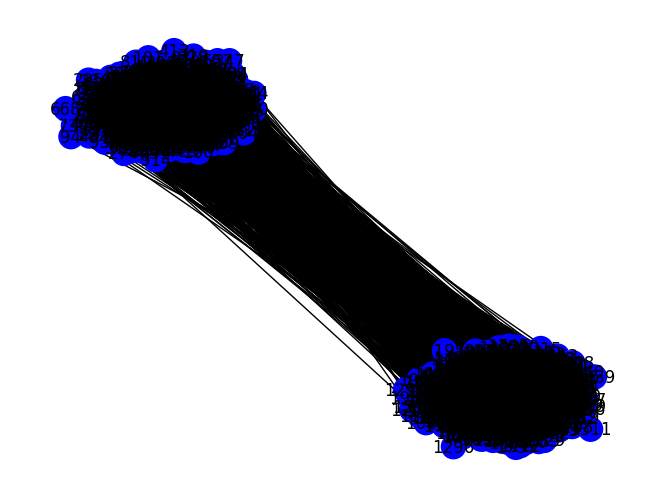

In [291]:

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
color_map = [colors[clustering_labels[i]] for i in range(len(G.nodes))]
nx.draw(G, pos, with_labels=True, node_color=color_map)
plt.show()